In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

df = pd.read_csv('gym.csv')
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


Добавим атрибут суммарное время сессии за неделю в часах

In [38]:
df['Sum Session time in week (hours)'] = df['Workout_Frequency (days/week)']*df['Session_Duration (hours)']
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Sum Session time in week (hours)
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.197326,6.76
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,31.996241,5.20
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.713311,4.44
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.408304,1.77
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.387816,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.768662,6.28
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.693453,2.76
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.498967,8.60
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.743737,3.30


In [3]:
df[df.duplicated()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI


дуликатов нет

In [4]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
df_num = df.select_dtypes('float64')
df_num.head(10)

,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
0,88.3,1.71,1.69,1313.0,12.6,3.5,30.197326
1,74.9,1.53,1.30,883.0,33.9,2.1,31.996241
2,68.1,1.66,1.11,677.0,33.4,2.3,24.713311
3,53.2,1.70,0.59,532.0,28.8,2.1,18.408304
4,46.1,1.79,0.64,556.0,29.2,2.8,14.387816
5,58.0,1.68,1.59,1116.0,15.5,2.7,20.549887
6,70.3,1.72,1.49,1385.0,21.3,2.3,23.762845
7,69.7,1.51,1.27,895.0,30.6,1.9,30.568835
8,121.7,1.94,1.03,719.0,28.9,2.6,32.336061
9,101.8,1.84,1.08,808.0,29.7,2.7,30.068526


In [7]:
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df_num[col] - m)/s
df_std.head(10)

,Weight (kg)_n,Height (m)_n,Session_Duration (hours)_n,Calories_Burned_n,Fat_Percentage_n,Water_Intake (liters)_n,BMI_n
0,0.681142,-0.098494,1.263948,1.494921,-1.977304,1.455218,0.793447
1,0.049290,-1.507828,0.127033,-0.082241,1.425568,-0.877446,1.063517
2,-0.271351,-0.489976,-0.426849,-0.837812,1.345688,-0.544209,-0.029865
3,-0.973933,-0.176790,-1.942736,-1.369646,0.610796,-0.877446,-0.976432
4,-1.308720,0.527877,-1.796977,-1.281618,0.674700,0.288886,-1.580025
5,-0.747598,-0.333383,0.972432,0.772361,-1.514002,0.122267,-0.654917
6,-0.167614,-0.020198,0.680915,1.759004,-0.587398,-0.544209,-0.172558
7,-0.195906,-1.664421,0.039578,-0.038228,0.898362,-1.210684,0.849221
8,2.256057,1.702322,-0.660062,-0.683764,0.626772,-0.044352,1.114534
9,1.317709,0.919358,-0.514304,-0.357328,0.754579,0.122267,0.774110


C:\Users\Leo\AppData\Local\Temp\ipykernel_13548\659195229.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_std.columns)


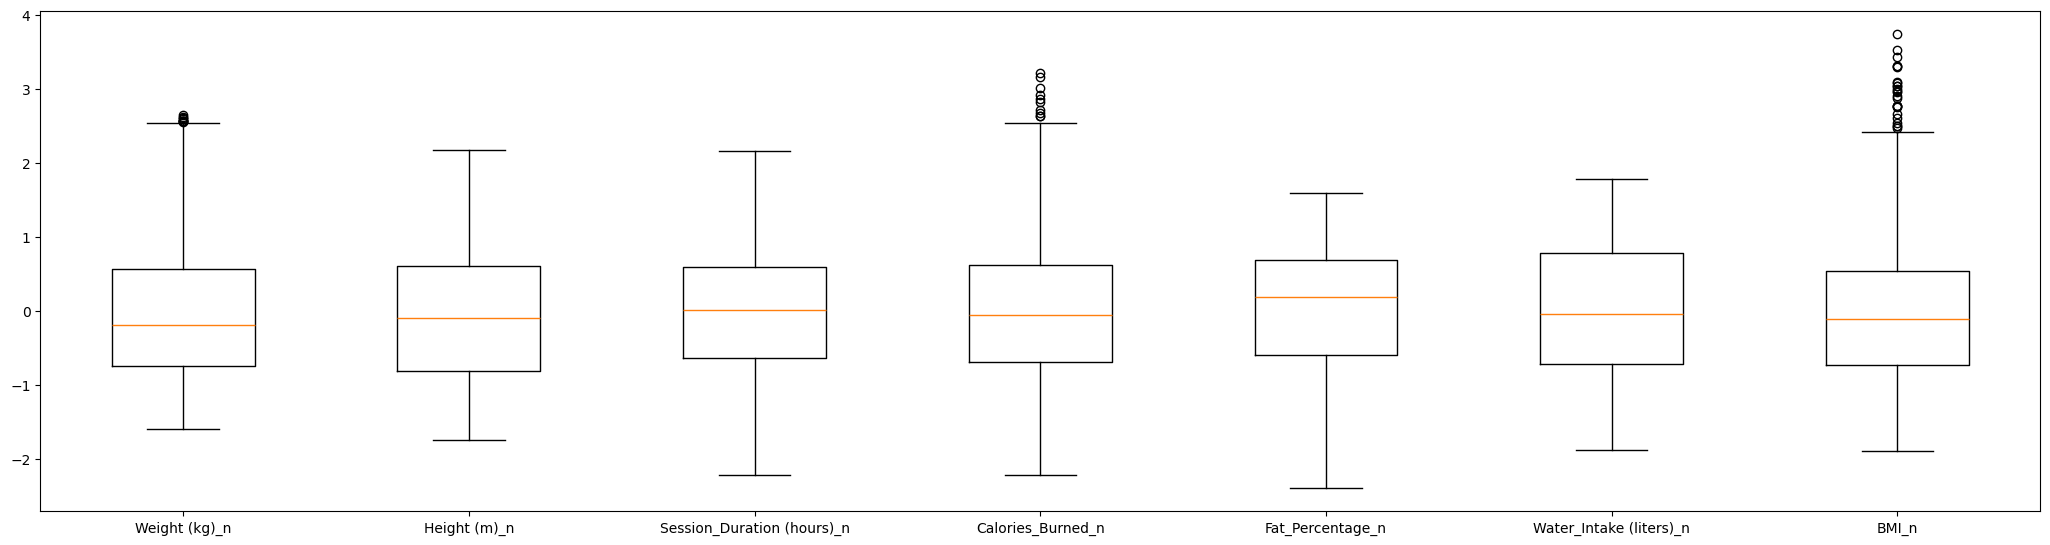

In [8]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

data = []
for col in df_std.columns:
  data.append(df_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

In [9]:
df['Height (m)'].describe()

count    973.00000
mean       1.72258
std        0.12772
min        1.50000
25%        1.62000
50%        1.71000
75%        1.80000
max        2.00000
Name: Height (m), dtype: float64

In [10]:
df[df['Height (m)'] == df['Height (m)'].max()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
13,41,Male,94.5,2.0,179,136,69,1.18,794.0,HIIT,27.6,3.7,3,1,23.625
286,29,Male,125.9,2.0,186,152,67,1.36,1137.0,Strength,24.7,3.1,4,2,31.475
542,46,Male,84.3,2.0,189,162,66,1.83,1467.0,HIIT,13.3,3.5,5,3,21.075
589,30,Male,121.6,2.0,179,160,60,1.24,1091.0,Cardio,28.0,3.3,4,2,30.400
595,49,Male,88.6,2.0,162,127,56,1.83,1150.0,Cardio,14.9,3.5,4,3,22.150
613,40,Male,63.0,2.0,176,161,71,1.42,1257.0,Strength,26.8,2.9,4,2,15.750
678,54,Male,116.4,2.0,184,123,65,1.13,688.0,Yoga,26.2,3.1,3,1,29.100
908,26,Male,51.9,2.0,173,133,54,0.75,549.0,HIIT,26.6,2.3,2,1,12.975
909,28,Male,58.3,2.0,198,135,65,1.32,980.0,Strength,28.2,3.0,4,2,14.575


In [11]:
df[df['Height (m)'] == df['Height (m)'].min()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
272,33,Female,45.9,1.5,189,144,62,0.92,662.0,Yoga,29.8,1.7,3,1,20.400000
347,42,Female,49.2,1.5,173,131,63,1.15,678.0,HIIT,27.7,1.5,3,2,21.866667
395,26,Female,64.1,1.5,194,134,60,1.93,1293.0,Strength,15.1,2.7,5,3,28.488889
435,51,Female,56.3,1.5,182,142,66,1.43,914.0,Cardio,27.4,2.4,3,1,25.022222
450,37,Female,69.5,1.5,196,130,66,0.69,448.0,Cardio,32.8,2.4,2,1,30.888889
500,54,Female,46.6,1.5,175,165,58,1.38,1025.0,Strength,30.6,2.0,2,1,20.711111
548,34,Female,68.4,1.5,192,132,61,1.37,904.0,Cardio,33.7,2.1,4,2,30.400000
550,24,Female,59.4,1.5,199,132,60,1.25,825.0,Yoga,25.0,2.0,3,2,26.400000
864,28,Female,56.0,1.5,193,128,56,1.94,1242.0,Strength,16.7,2.7,5,3,24.888889
919,26,Female,71.2,1.5,182,142,54,1.15,816.0,Cardio,34.6,2.6,2,1,31.644444


In [12]:
df.loc[(df['Height (m)'] == df['Height (m)'].max()), 'Height (m)'] = np.NaN
df.loc[(df['Height (m)'] == df['Height (m)'].min()), 'Height (m)'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
13,41,Male,94.5,NaN,179,136,69,1.18,794.0,HIIT,27.6,3.7,3,1,23.625000
272,33,Female,45.9,NaN,189,144,62,0.92,662.0,Yoga,29.8,1.7,3,1,20.400000
286,29,Male,125.9,NaN,186,152,67,1.36,1137.0,Strength,24.7,3.1,4,2,31.475000
347,42,Female,49.2,NaN,173,131,63,1.15,678.0,HIIT,27.7,1.5,3,2,21.866667
395,26,Female,64.1,NaN,194,134,60,1.93,1293.0,Strength,15.1,2.7,5,3,28.488889
435,51,Female,56.3,NaN,182,142,66,1.43,914.0,Cardio,27.4,2.4,3,1,25.022222
450,37,Female,69.5,NaN,196,130,66,0.69,448.0,Cardio,32.8,2.4,2,1,30.888889
500,54,Female,46.6,NaN,175,165,58,1.38,1025.0,Strength,30.6,2.0,2,1,20.711111
542,46,Male,84.3,NaN,189,162,66,1.83,1467.0,HIIT,13.3,3.5,5,3,21.075000
548,34,Female,68.4,NaN,192,132,61,1.37,904.0,Cardio,33.7,2.1,4,2,30.400000


In [13]:
df['Height (m)'].describe()

count    953.000000
mean       1.722529
std        0.123915
min        1.510000
25%        1.620000
50%        1.710000
75%        1.800000
max        1.990000
Name: Height (m), dtype: float64

In [14]:
df[df['Height (m)'] == df['Height (m)'].max()]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
117,20,Male,82.7,1.99,179,146,59,1.69,1357.0,HIIT,14.6,3.5,5,3,20.883311
204,23,Male,83.8,1.99,179,130,71,1.79,1280.0,Cardio,11.0,3.5,4,3,21.161082
250,36,Male,99.9,1.99,189,147,73,1.33,1075.0,Yoga,20.9,2.5,3,1,25.226636
287,39,Male,105.5,1.99,199,133,71,0.81,593.0,HIIT,26.4,2.5,2,1,26.640741
294,44,Male,89.3,1.99,192,135,58,1.40,936.0,HIIT,26.3,2.0,4,2,22.549936
355,33,Male,113.6,1.99,169,125,58,1.38,949.0,Strength,28.4,3.4,2,1,28.686144
381,52,Male,104.8,1.99,187,130,67,0.93,598.0,Cardio,24.0,2.0,2,1,26.463978
384,30,Male,91.4,1.99,171,152,60,1.37,1145.0,HIIT,23.0,3.7,3,2,23.080225
410,29,Male,81.7,1.99,162,126,54,1.45,1005.0,Strength,29.4,3.2,2,1,20.630792
412,33,Male,81.8,1.99,184,137,51,1.59,1198.0,Strength,10.5,3.5,4,3,20.656044


In [15]:
df.loc[(df['Height (m)'] == df['Height (m)'].max()), 'Height (m)'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
13,41,Male,94.5,NaN,179,136,69,1.18,794.0,HIIT,27.6,3.7,3,1,23.625000
117,20,Male,82.7,NaN,179,146,59,1.69,1357.0,HIIT,14.6,3.5,5,3,20.883311
204,23,Male,83.8,NaN,179,130,71,1.79,1280.0,Cardio,11.0,3.5,4,3,21.161082
250,36,Male,99.9,NaN,189,147,73,1.33,1075.0,Yoga,20.9,2.5,3,1,25.226636
272,33,Female,45.9,NaN,189,144,62,0.92,662.0,Yoga,29.8,1.7,3,1,20.400000
286,29,Male,125.9,NaN,186,152,67,1.36,1137.0,Strength,24.7,3.1,4,2,31.475000
287,39,Male,105.5,NaN,199,133,71,0.81,593.0,HIIT,26.4,2.5,2,1,26.640741
294,44,Male,89.3,NaN,192,135,58,1.40,936.0,HIIT,26.3,2.0,4,2,22.549936
347,42,Female,49.2,NaN,173,131,63,1.15,678.0,HIIT,27.7,1.5,3,2,21.866667
355,33,Male,113.6,NaN,169,125,58,1.38,949.0,Strength,28.4,3.4,2,1,28.686144


In [16]:
df['Height (m)'].describe()

count    938.000000
mean       1.718252
std        0.120155
min        1.510000
25%        1.620000
50%        1.710000
75%        1.790000
max        1.980000
Name: Height (m), dtype: float64

In [17]:
df_num = df.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer.fit(df_num)
df_num = pd.DataFrame(imputer.transform(df_num), index=df_num.index, columns=df_num.columns)
df['Height (m)'] = df_num['Height (m)']
df['Height (m)'].describe()

count    973.000000
mean       1.718904
std        0.119036
min        1.510000
25%        1.620000
50%        1.710000
75%        1.790000
max        1.980000
Name: Height (m), dtype: float64

In [18]:
df.loc[[757]]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
757,49,Male,57.8,1.722,183,161,67,0.93,741.0,HIIT,24.7,3.1,3,1,14.595591


C:\Users\Leo\AppData\Local\Temp\ipykernel_13548\2967847061.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_std.columns)


<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

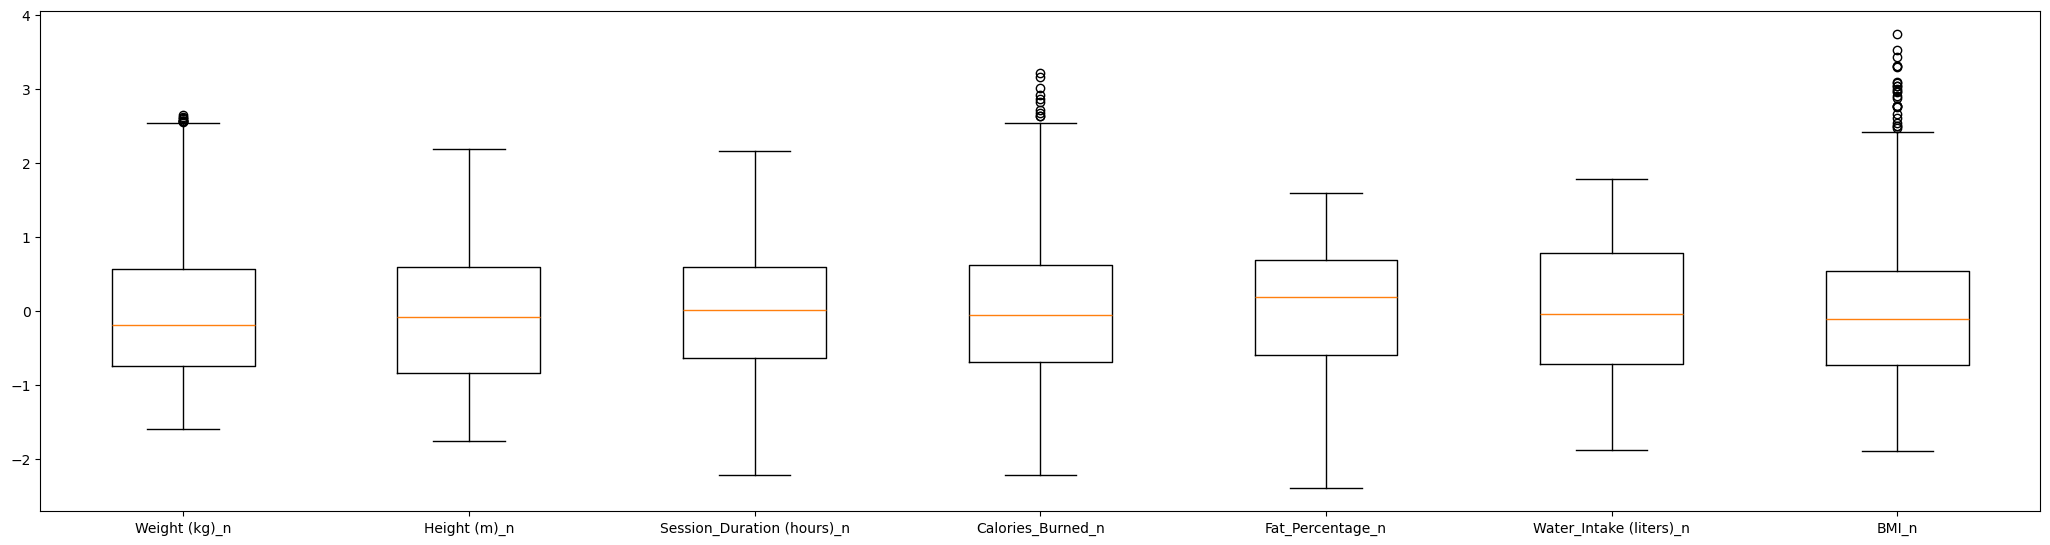

In [19]:
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df_num[col] - m)/s

  fig = plt.figure(figsize = (20, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

data = []
for col in df_std.columns:
  data.append(df_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

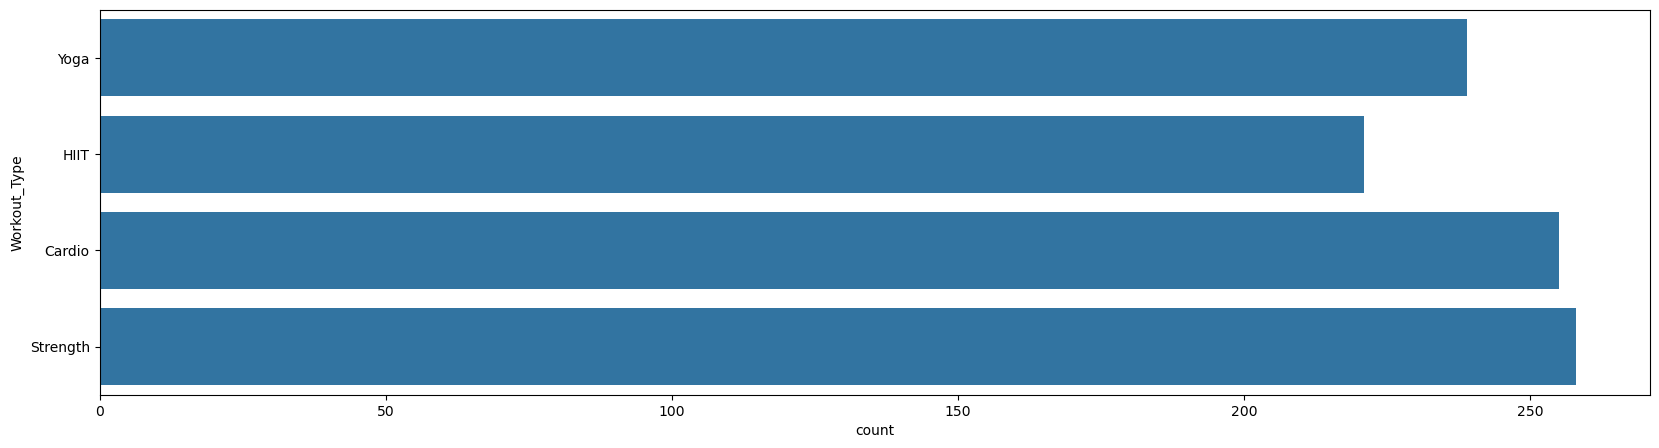

In [20]:
plt.figure(1 , figsize = (20 , 5))
sns.countplot(y = 'Workout_Type' , data = df)
plt.show()

Calories_Burned   Session_Duration (hours)    Height (m)    Weight (kg)

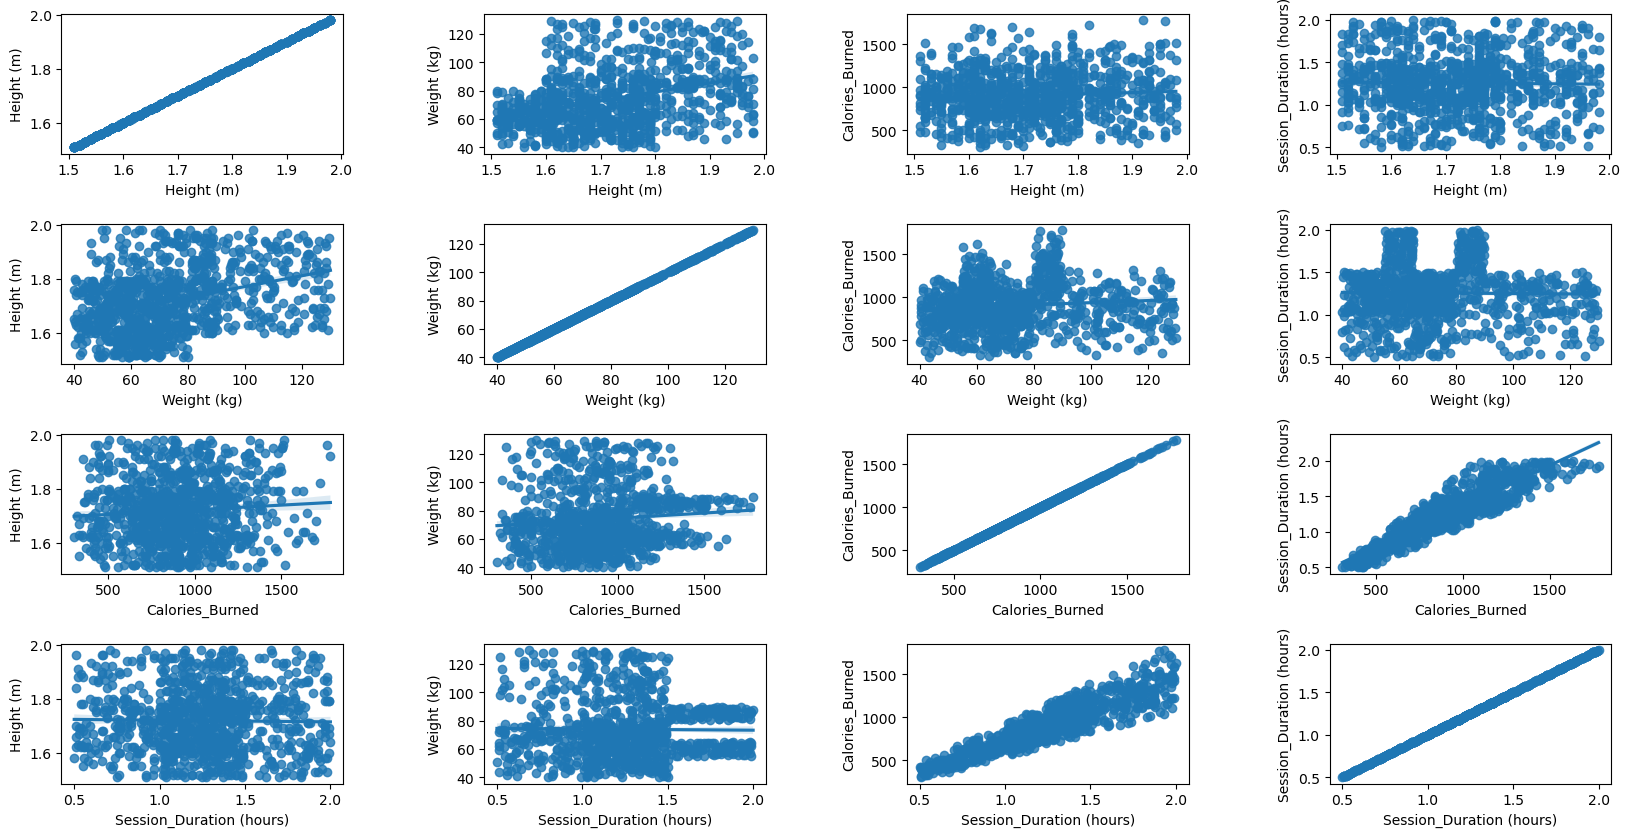

In [21]:
plt.figure(1, figsize = (20 , 10))
n = 0
for x in ['Height (m)', 'Weight (kg)', 'Calories_Burned', 'Session_Duration (hours)']:
    for y in ['Height (m)', 'Weight (kg)', 'Calories_Burned', 'Session_Duration (hours)']:
        n += 1
        plt.subplot(4, 4, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

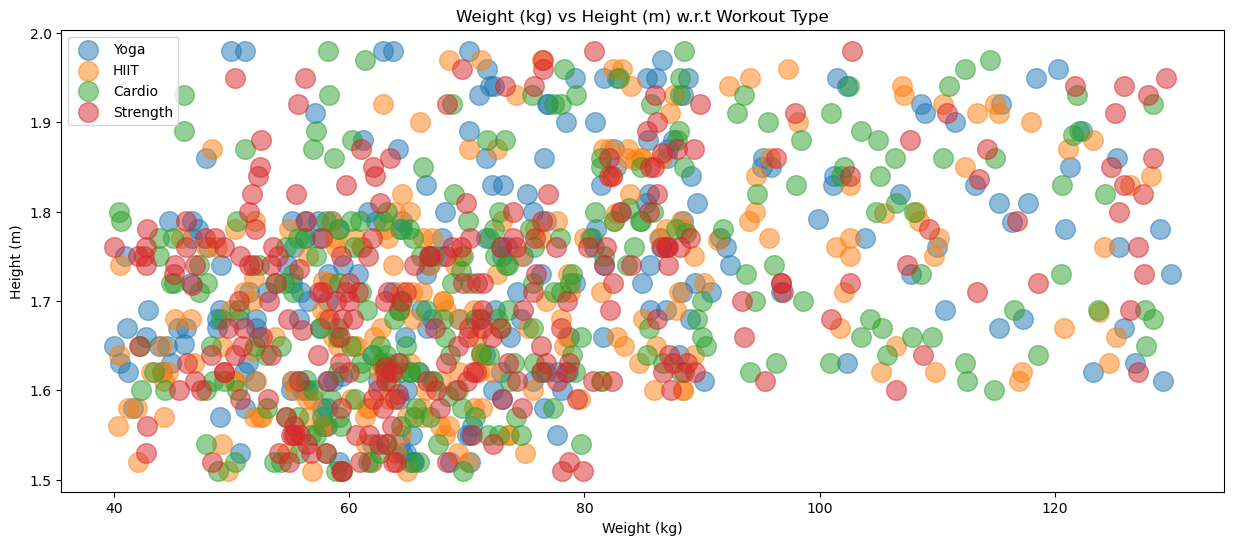

In [22]:
plt.figure(1, figsize = (15, 6))
for type in ['Yoga', 'HIIT', 'Cardio', 'Strength']:
    plt.scatter(x = 'Weight (kg)', y = 'Height (m)', data = df[df['Workout_Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')
plt.title('Weight (kg) vs Height (m) w.r.t Workout Type')
plt.legend()
plt.show()

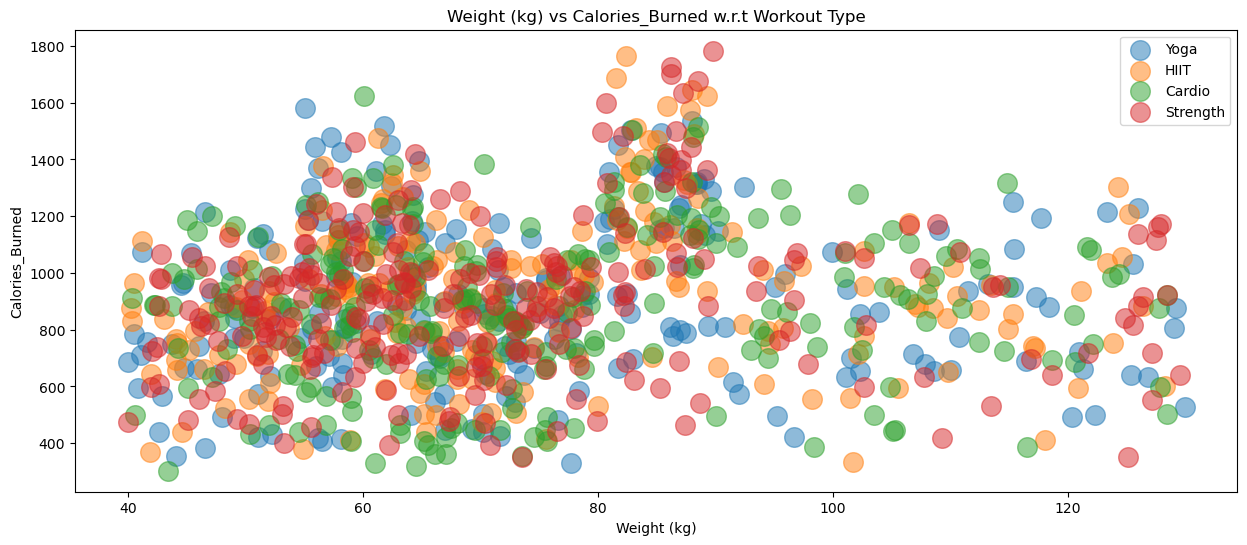

In [23]:
plt.figure(1, figsize = (15, 6))
for type in ['Yoga', 'HIIT', 'Cardio', 'Strength']:
    plt.scatter(x = 'Weight (kg)', y = 'Calories_Burned', data = df[df['Workout_Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.xlabel('Weight (kg)')
plt.ylabel('Calories_Burned')
plt.title('Weight (kg) vs Calories_Burned w.r.t Workout Type')
plt.legend()
plt.show()

Calories_Burned Session_Duration (hours) 

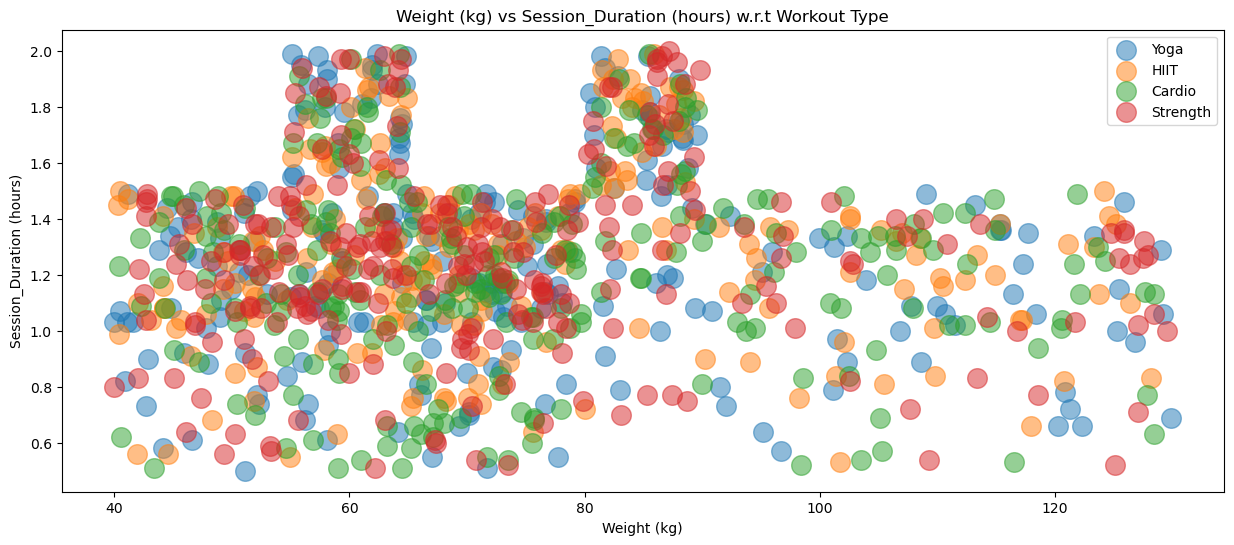

In [24]:
plt.figure(1, figsize = (15, 6))
for type in ['Yoga', 'HIIT', 'Cardio', 'Strength']:
    plt.scatter(x = 'Weight (kg)', y = 'Session_Duration (hours)', data = df[df['Workout_Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.xlabel('Weight (kg)')
plt.ylabel('Session_Duration (hours)')
plt.title('Weight (kg) vs Session_Duration (hours) w.r.t Workout Type')
plt.legend()
plt.show()

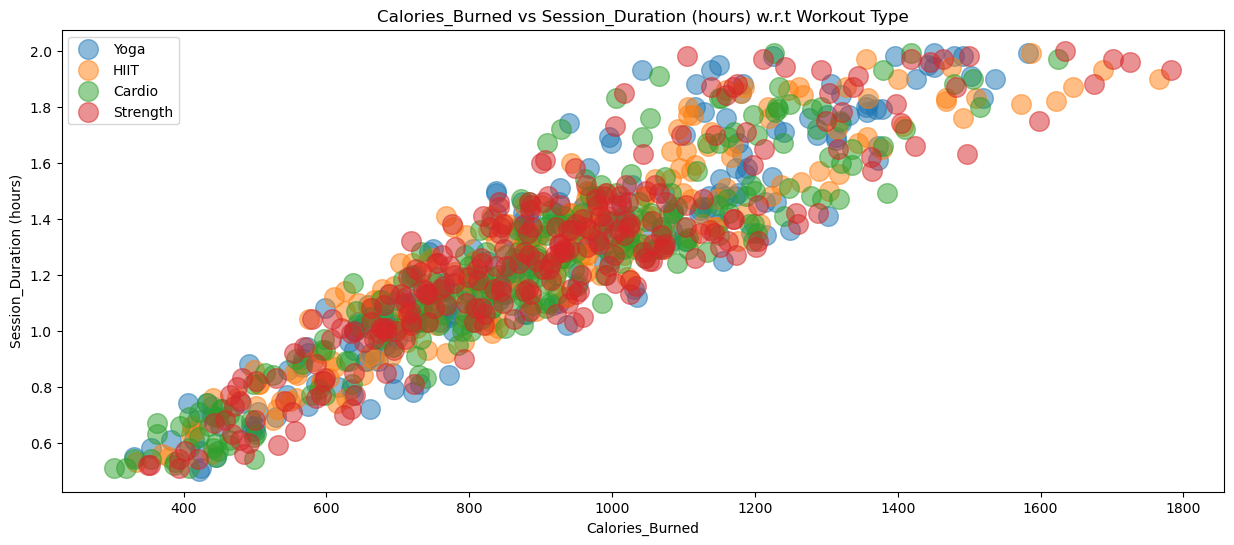

In [25]:
plt.figure(1, figsize = (15, 6))
for type in ['Yoga', 'HIIT', 'Cardio', 'Strength']:
    plt.scatter(x = 'Calories_Burned', y = 'Session_Duration (hours)', data = df[df['Workout_Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.xlabel('Calories_Burned')
plt.ylabel('Session_Duration (hours)')
plt.title('Calories_Burned vs Session_Duration (hours) w.r.t Workout Type')
plt.legend()
plt.show()

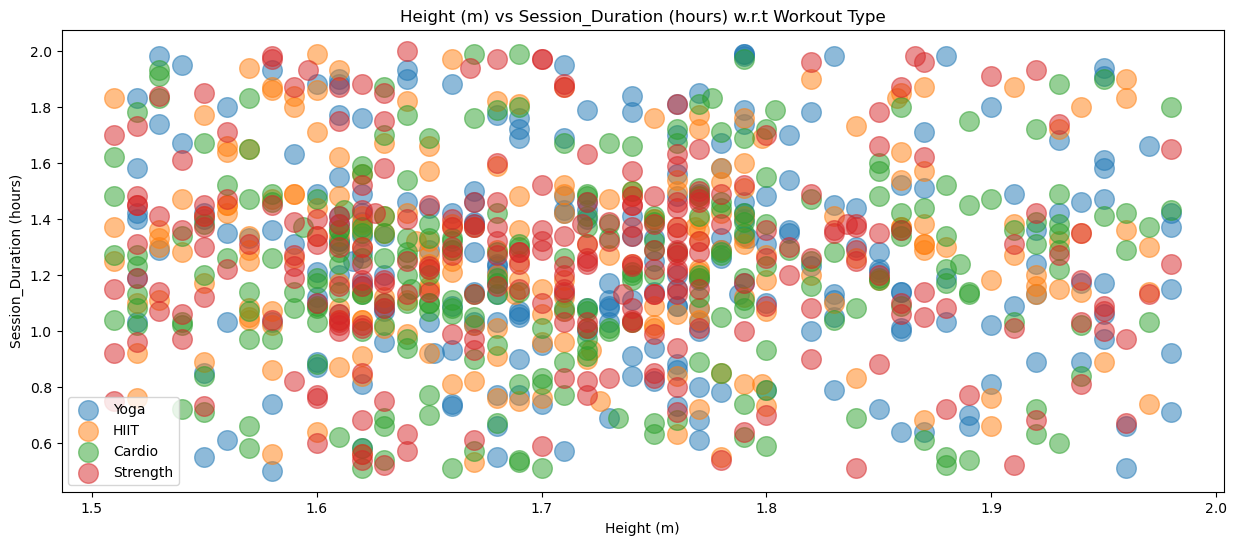

In [26]:
plt.figure(1, figsize = (15, 6))
for type in ['Yoga', 'HIIT', 'Cardio', 'Strength']:
    plt.scatter(x = 'Height (m)', y = 'Session_Duration (hours)', data = df[df['Workout_Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.xlabel('Height (m)')
plt.ylabel('Session_Duration (hours)')
plt.title('Height (m) vs Session_Duration (hours) w.r.t Workout Type')
plt.legend()
plt.show()

Вес и рост

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

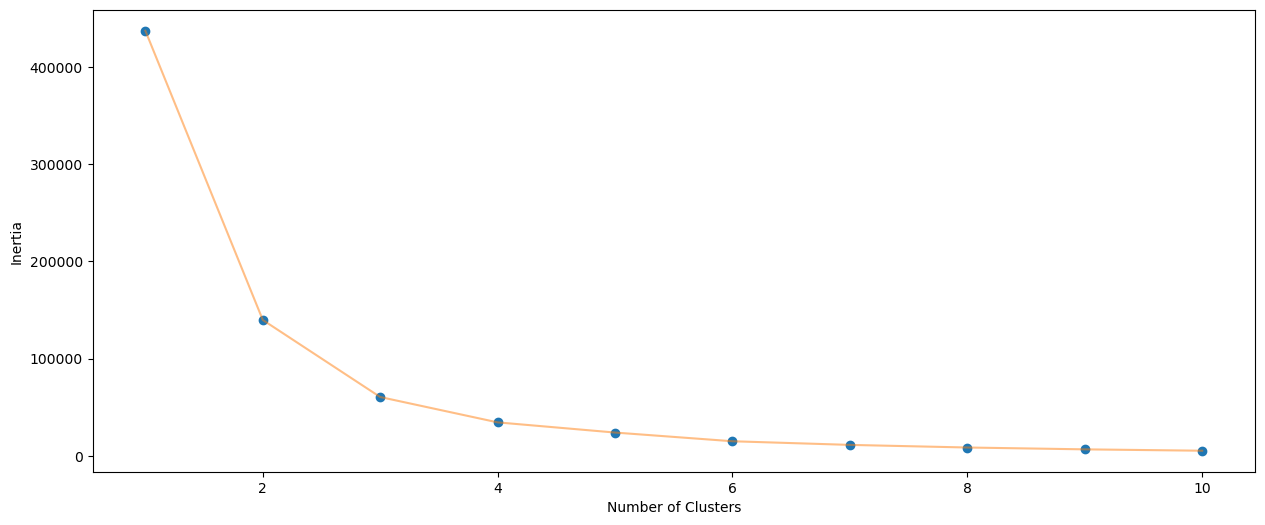

In [27]:
X1 = df[['Weight (kg)', 'Height (m)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

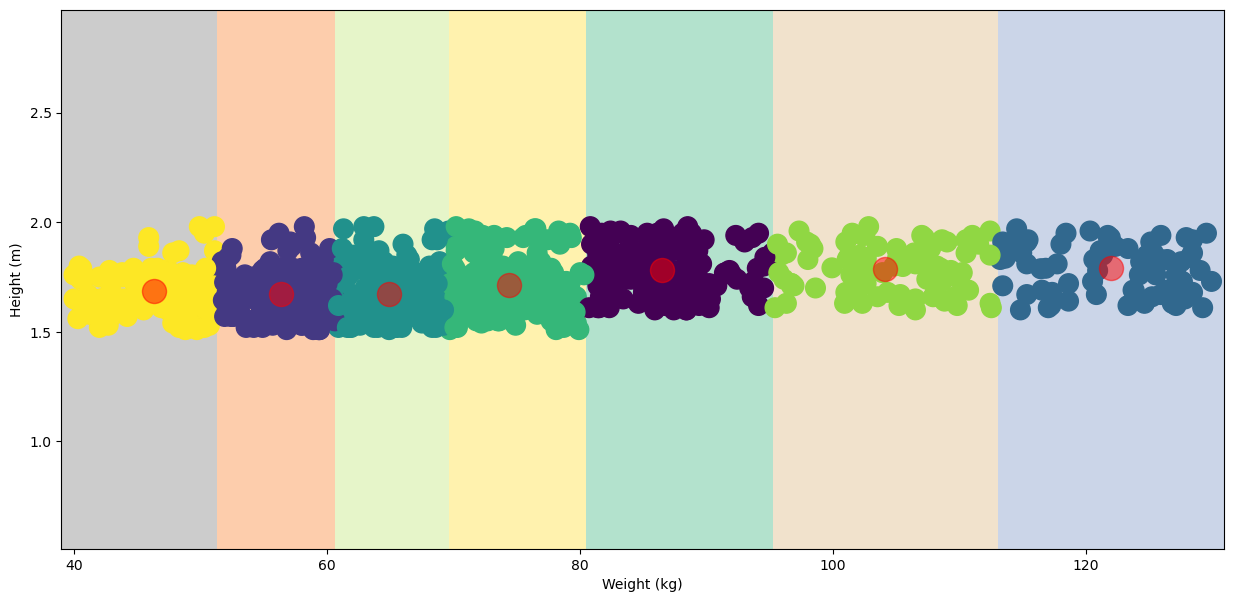

In [28]:
algorithm = (KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter = 300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x='Weight (kg)', y ='Height (m)', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')
plt.show()

Вес и соженные каллории

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

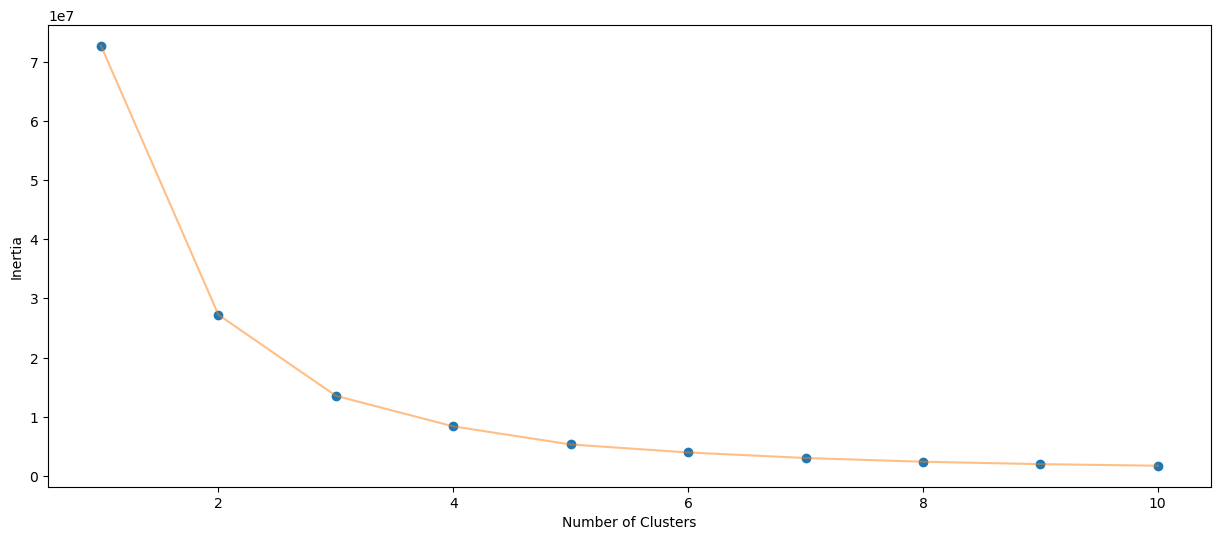

In [29]:
X2 = df[['Weight (kg)', 'Calories_Burned']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111 , algorithm='lloyd'))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

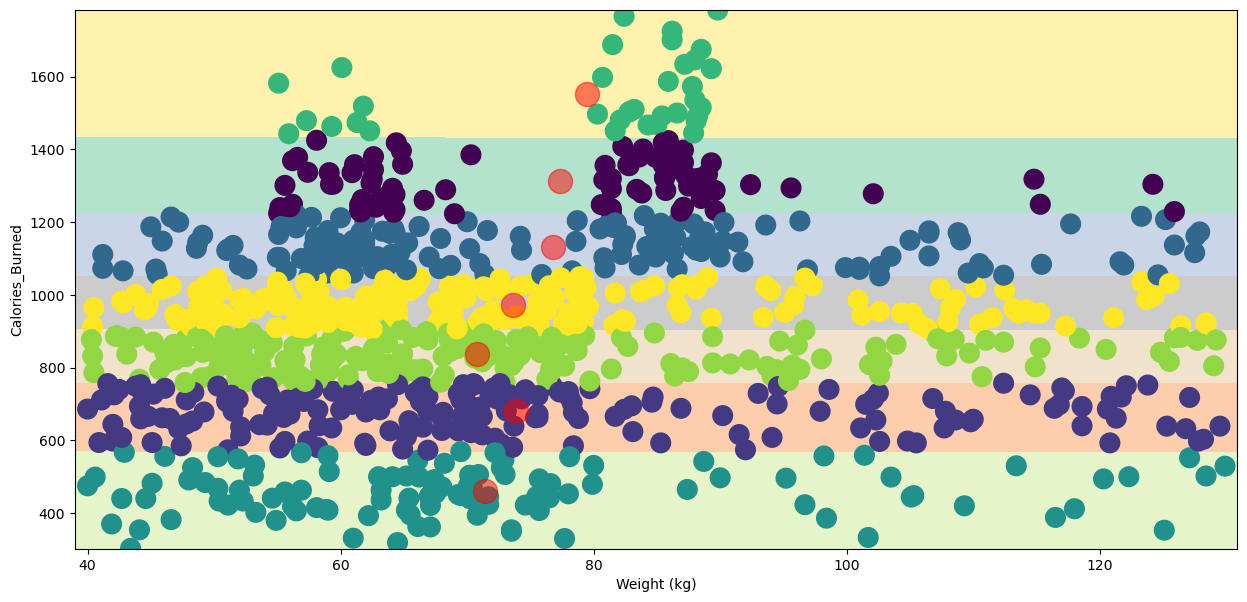

In [30]:
algorithm = (KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111 , algorithm='elkan'))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Weight (kg)', y = 'Calories_Burned', data = df, c = labels2, s = 200 )
plt.scatter(x = centroids2[:, 0], y = centroids2[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Weight (kg)')
plt.ylabel('Calories_Burned')
plt.show()

Вес и продолжительность одного занятия

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

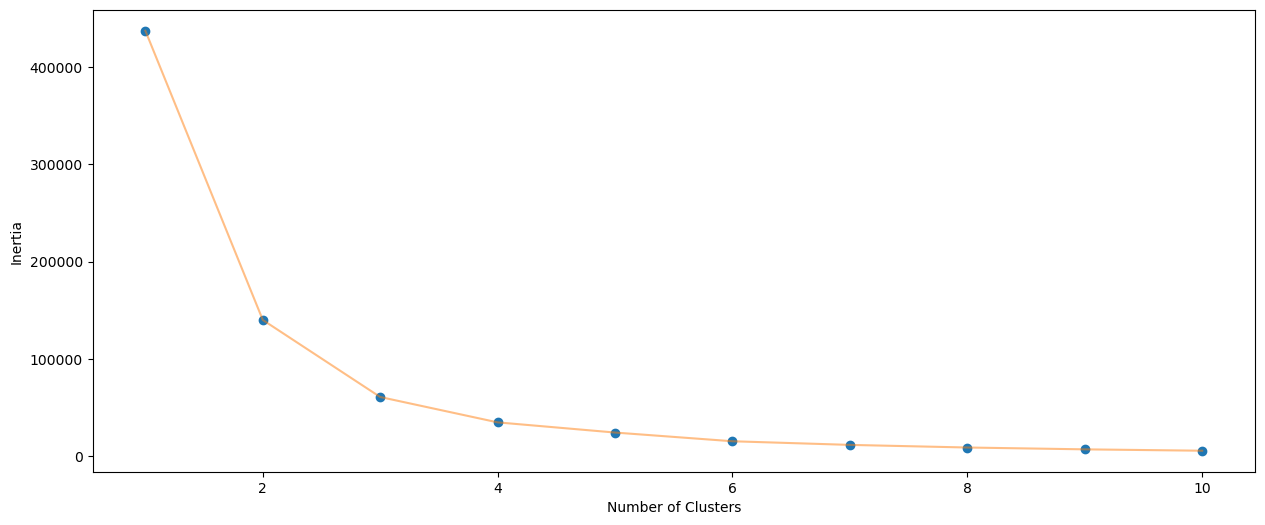

In [31]:
X3 = df[['Weight (kg)', 'Session_Duration (hours)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111 , algorithm='lloyd') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15 ,6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

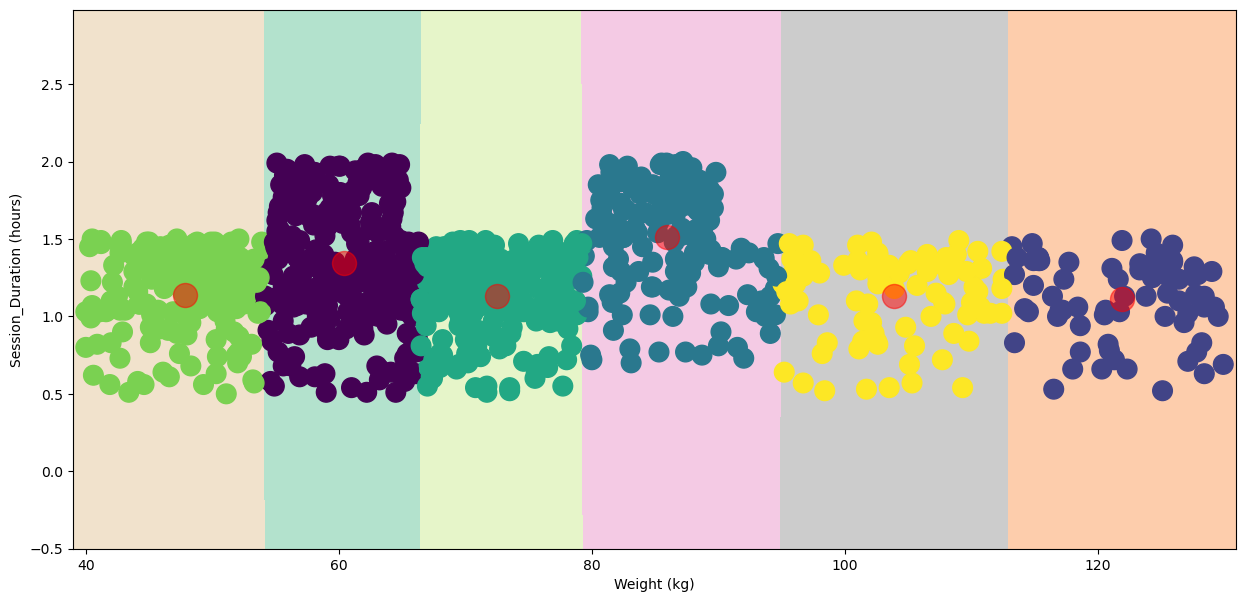

In [32]:
algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan'))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Weight (kg)', y = 'Session_Duration (hours)', data = df, c = labels3, s = 200 )
plt.scatter(x = centroids3[:, 0], y = centroids3[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Weight (kg)')
plt.ylabel('Session_Duration (hours)')
plt.show()

Соженные каллории и продолжительность одного занятия

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

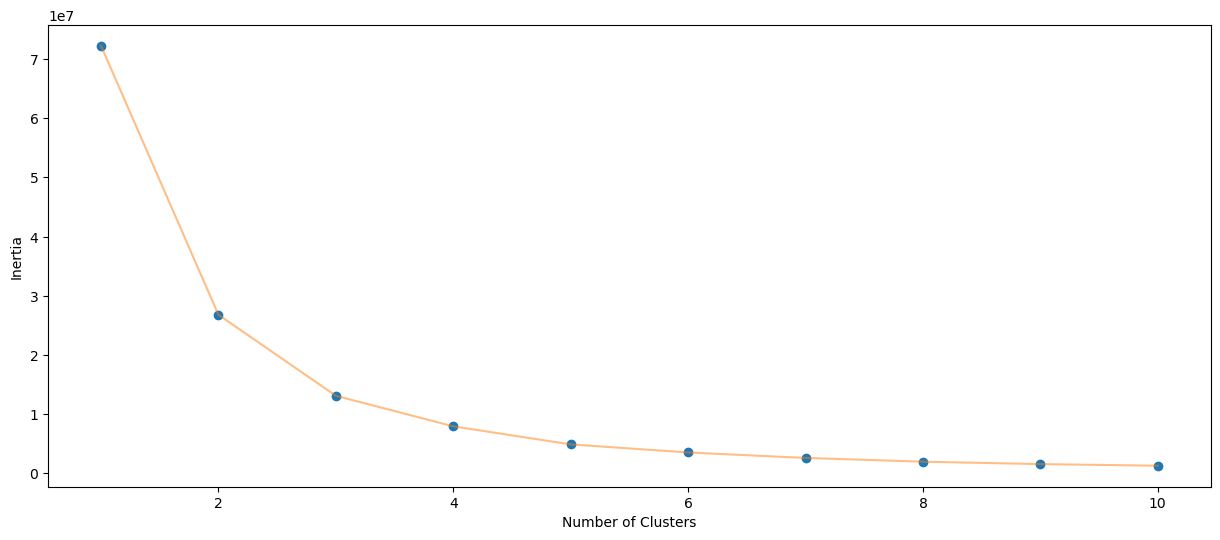

In [33]:
X4 = df[['Calories_Burned', 'Session_Duration (hours)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

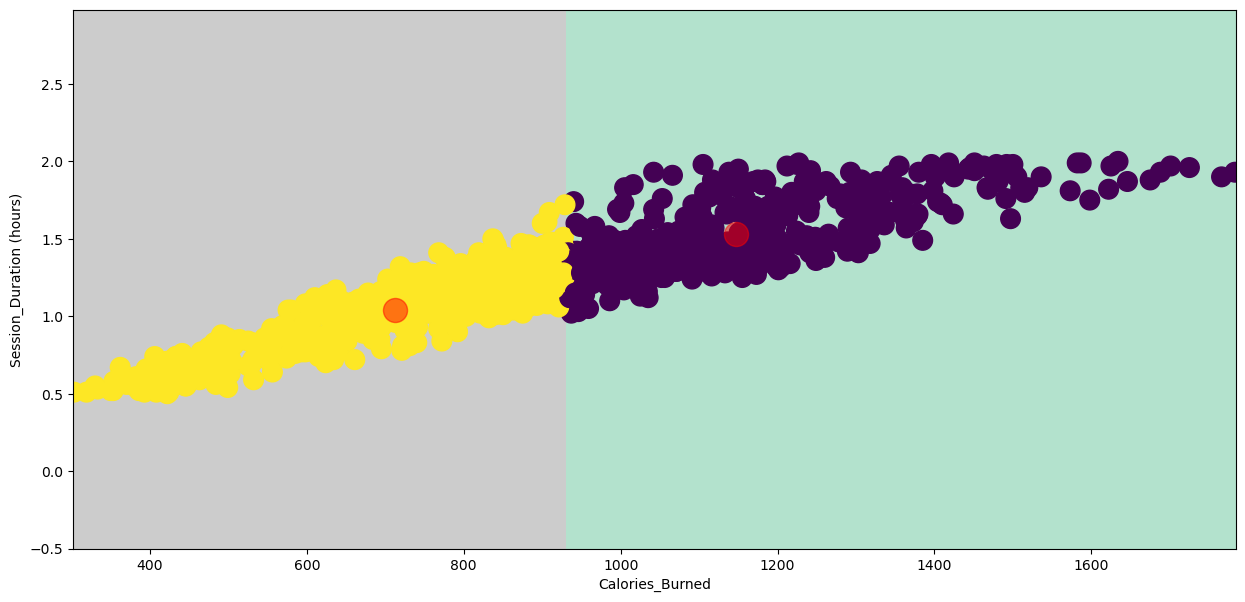

In [34]:
algorithm = (KMeans(n_clusters = 2, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z4 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z4 = Z4.reshape(xx.shape)
plt.imshow(Z4, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Calories_Burned', y = 'Session_Duration (hours)', data = df, c = labels4, s = 200 )
plt.scatter(x = centroids4[:, 0], y = centroids4[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Calories_Burned')
plt.ylabel('Session_Duration (hours)')
plt.show()

Рост и продолжительность одного занятия

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

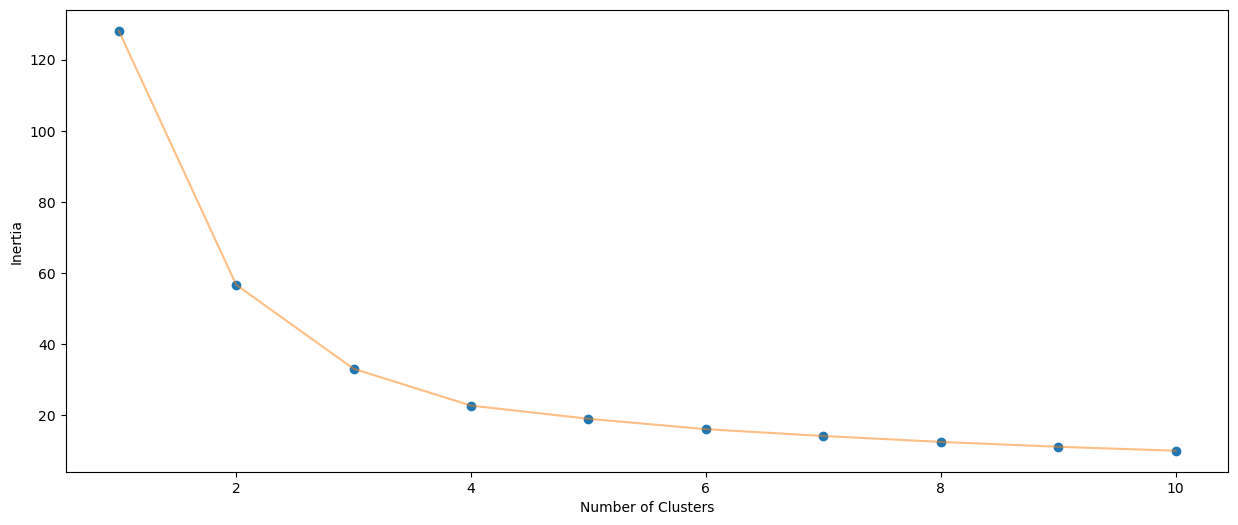

In [35]:
X5 = df[['Height (m)', 'Session_Duration (hours)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X5)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

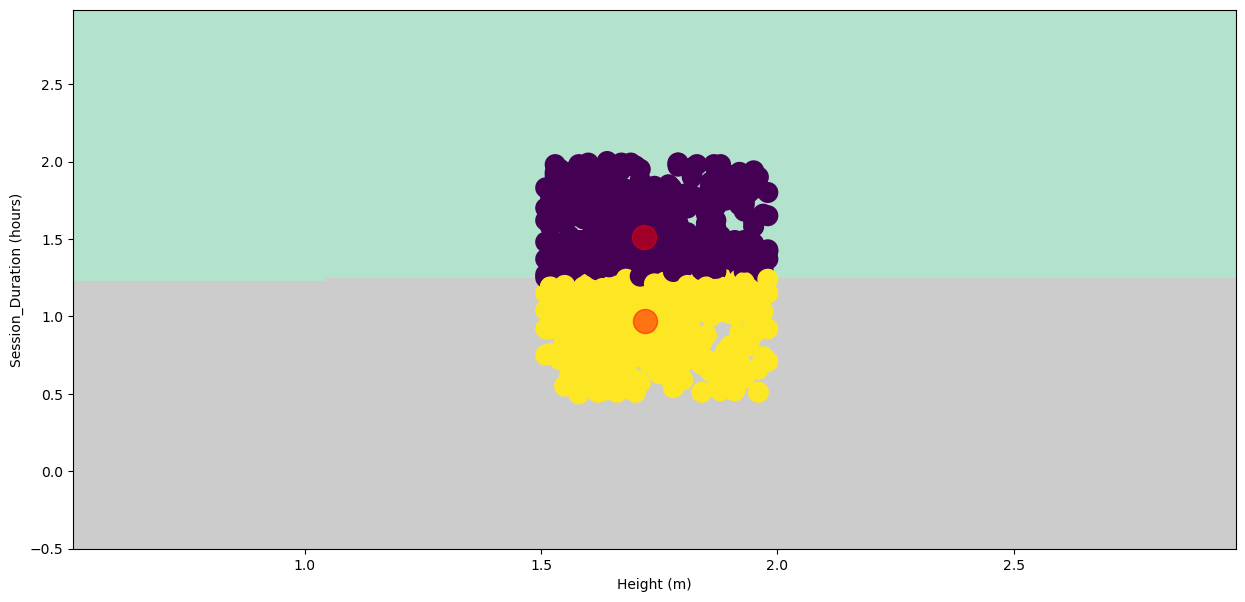

In [36]:
algorithm = (KMeans(n_clusters = 2, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X5)
labels5 = algorithm.labels_
centroids5 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z5 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z5 = Z5.reshape(xx.shape)
plt.imshow(Z5, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Height (m)', y = 'Session_Duration (hours)', data = df, c = labels5, s = 200 )
plt.scatter(x = centroids5[:, 0], y = centroids5[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Height (m)')
plt.ylabel('Session_Duration (hours)')
plt.show()